# Saiket System
## Task 5 : Model Evaluation and Interpretation

###Description:
#### Evaluate the best predictive model using the testing dataset. Interpret model coefficients or feature importances to comprehend factors influencing churn. Create ROC curves and calculate AUC for model performance assessment.

In [25]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
# 1. Load and preprocess (same as Task 4)

df = pd.read_csv("/content/Telco_Customer_Churn_Dataset.csv")

df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

y = df["Churn"].map({"No": 0, "Yes": 1})
X = df.drop(["customerID", "Churn"], axis=1)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
# Best model (Random Forest)

best_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[934 101]
 [180 194]]


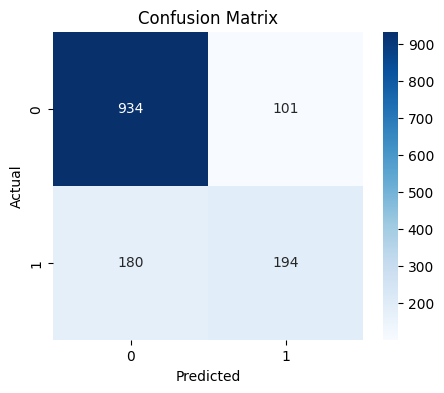

In [28]:
# 2. Predictions & model evaluation

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Top 10 Important Features:
tenure                            0.180062
TotalCharges                      0.167999
MonthlyCharges                    0.111611
InternetService_Fiber optic       0.073137
Contract_Two year                 0.062748
PaymentMethod_Electronic check    0.058690
OnlineSecurity_Yes                0.037537
Contract_One year                 0.036325
TechSupport_Yes                   0.023374
PaperlessBilling_Yes              0.022046
dtype: float64


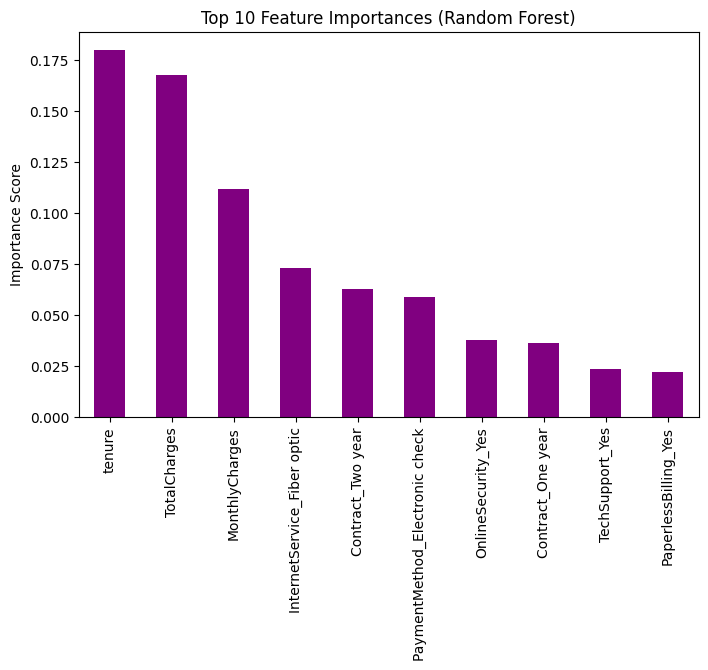

In [29]:
# 3. Feature Importance Interpretation

feature_importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))

plt.figure(figsize=(8,5))
feature_importances.head(10).plot(kind="bar", color="purple")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


AUC Score: 0.8417628975173732


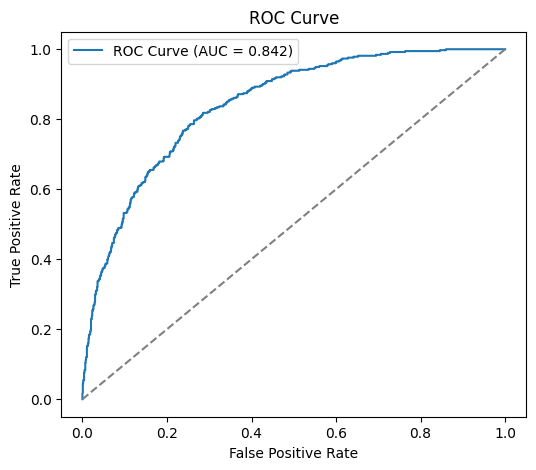

In [30]:
# 4. ROC Curve & AUC Score

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("\nAUC Score:", auc_score)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(auc_score))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()